# Preperation

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from datetime import datetime

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 import os
 arr = os.listdir('/content/drive/My Drive/31-M29')
 print(arr)

['2020 Q4.csv', '2020 Q3.csv', '2020 Q2.csv', '2019 Q4.csv', '2019 Q3.csv', '2019 Q2.csv', '2018 Q4.csv', '2018 Q3.csv', '2018 Q2.csv', '2019 Q1.csv', '2020 Q1.csv']


In [ ]:
filenames=[]
dfs=[]
dfs_new=[]
arr.remove('2020 Q3.csv')
arr.remove('2020 Q2.csv')
for name in arr:
  filename="/content/drive/My Drive/31-M29/"+name
  filenames.append(filename)
dfs = [pd.read_csv(filename,sep=';',encoding='mac_roman') for filename in filenames]



q2_20=pd.read_csv("/content/drive/My Drive/31-M29/2020 Q2.csv",sep=';')


q3_20=pd.read_csv("/content/drive/My Drive/31-M29/2020 Q3.csv",sep=';')
q3_20['Date']=q3_20['Date']+' '+q3_20['Uhrzeit']
del q3_20['Uhrzeit']
q3_20


dfs.append(q2_20)
dfs.append(q3_20)



for df in dfs:                                                                # https://stackoverflow.com/questions/28654047/pandas-convert-some-columns-into-rows
  df=df.melt(id_vars='Date',value_name='Value',var_name='Street')
  dfs_new.append(df)


bike = pd.concat(dfs_new, ignore_index=True)                             # https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

bike


,Date,Street,Value
0,01.10.2020 00:00,Grugatrasse R¸ttenscheid_West,0.0
1,01.10.2020 01:00,Grugatrasse R¸ttenscheid_West,0.0
2,01.10.2020 02:00,Grugatrasse R¸ttenscheid_West,0.0
3,01.10.2020 03:00,Grugatrasse R¸ttenscheid_West,1.0
4,01.10.2020 04:00,Grugatrasse R¸ttenscheid_West,0.0
...,...,...,...
90715,30.09.2020 19:00,Huyssenallee_Stadtkern_Nord,23.0
90716,30.09.2020 20:00,Huyssenallee_Stadtkern_Nord,16.0
90717,30.09.2020 21:00,Huyssenallee_Stadtkern_Nord,6.0
90718,30.09.2020 22:00,Huyssenallee_Stadtkern_Nord,4.0


In [ ]:
print(bike.describe())
print(bike.info())

              Value
count  90530.000000
mean      24.324876
std       36.506297
min        0.000000
25%        2.000000
50%       11.000000
75%       30.000000
max      415.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90720 entries, 0 to 90719
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    90720 non-null  object 
 1   Street  90720 non-null  object 
 2   Value   90530 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.1+ MB
None


In [ ]:
bike['Date']

0        01.10.2020 00:00
1        01.10.2020 01:00
2        01.10.2020 02:00
3        01.10.2020 03:00
4        01.10.2020 04:00
               ...       
90715    30.09.2020 19:00
90716    30.09.2020 20:00
90717    30.09.2020 21:00
90718    30.09.2020 22:00
90719    30.09.2020 23:00
Name: Date, Length: 90720, dtype: object

In [ ]:
bike['Date']=pd.to_datetime(bike['Date'],dayfirst=True,format='%d.%m.%Y %H:%M')
bike

,Date,Street,Value
0,2020-10-01 00:00:00,Grugatrasse R¸ttenscheid_West,0.0
1,2020-10-01 01:00:00,Grugatrasse R¸ttenscheid_West,0.0
2,2020-10-01 02:00:00,Grugatrasse R¸ttenscheid_West,0.0
3,2020-10-01 03:00:00,Grugatrasse R¸ttenscheid_West,1.0
4,2020-10-01 04:00:00,Grugatrasse R¸ttenscheid_West,0.0
...,...,...,...
90715,2020-09-30 19:00:00,Huyssenallee_Stadtkern_Nord,23.0
90716,2020-09-30 20:00:00,Huyssenallee_Stadtkern_Nord,16.0
90717,2020-09-30 21:00:00,Huyssenallee_Stadtkern_Nord,6.0
90718,2020-09-30 22:00:00,Huyssenallee_Stadtkern_Nord,4.0


In [ ]:
bike=bike.sort_values('Date',ignore_index=True)
#bike['Date']=bike['Date'].dt.strftime("%d-%m-%Y %H:%M")
bike

,Date,Street,Value
0,2018-06-01 00:00:00,Huyssenallee Ruettenscheid_Sued,0.0
1,2018-06-01 00:00:00,Grugatrasse Ruettenscheid_West,1.0
2,2018-06-01 00:00:00,Grugatrasse Ruhr_Ost,3.0
3,2018-06-01 00:00:00,Huyssenallee Stadtkern_Nord,3.0
4,2018-06-01 01:00:00,Huyssenallee Ruettenscheid_Sued,3.0
...,...,...,...
90715,2020-12-31 22:00:00,Grugatrasse R¸ttenscheid_West,0.0
90716,2020-12-31 23:00:00,Grugatrasse R¸ttenscheid_West,2.0
90717,2020-12-31 23:00:00,Huyssenallee Stadtkern_Nord,0.0
90718,2020-12-31 23:00:00,Huyssenallee Ruettenscheid_Sued,0.0


In [ ]:
bike['Street'].unique()

array(['Huyssenallee  Ruettenscheid_Sued',
       'Grugatrasse Ruettenscheid_West', 'Grugatrasse Ruhr_Ost',
       'Huyssenallee Stadtkern_Nord', 'Huyssenallee Ruettenscheid_Sued',
       'Huyssenallee Ruettenscheid_S¸d', 'Grugatrasse Rüttenscheid_West',
       'Huyssenallee_Stadtkern_Nord', 'Grugatrasse_Ruhr_Ost',
       'Huyssenallee_Ruettenscheid_Sued',
       'Grugatrasse_Ruettenscheid_West', 'Grugatrasse R¸ttenscheid_West'],
      dtype=object)

In [ ]:
bike.loc[bike['Street'].str.contains('West'),'Street']='Grugatrasse Rts. West'              # as we see above there are different names for the same streets, so we change that and also shorten some parts.
bike.loc[bike['Street'].str.contains('Ost'),'Street']='Grugatrasse Ruhr Ost'
bike.loc[bike['Street'].str.contains('Ruettenscheid'),'Street']='Huyssenallee Rts. Sued'
bike.loc[bike['Street'].str.contains('Nord'),'Street']='Huyssenallee Stkrn. Nord'

# Anomaly around the missing values

There are 190 missing values in the  'Value' column and all of them are in the rows with both 'Huyssenalle' as street names (saw this by looking at the excel table of the data set).
By taking a look at the value counts in this column, we see that every other value between the first and last occurennce of missing  values( one week time period) has a value of zero. 

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90720 entries, 0 to 90719
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    90720 non-null  datetime64[ns]
 1   Street  90720 non-null  object        
 2   Value   90530 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ MB


In [ ]:
print('Number of missing values:',len(bike[bike['Value'].isna()]))
bike_2=bike[(bike['Date'] >= '2020-03-26 00:00:00') & (bike['Date'] < '2020-04-02 12:00:00')]
bike_2=bike_2[bike_2['Street'].str.contains('Huy')]
print(('Value counts:',bike_2['Value'].value_counts()))

bike=bike.fillna(0)

Number of missing values: 190
('Value counts:', 0.0    170
Name: Value, dtype: int64)


In [ ]:
bike['Value']=bike['Value'].astype('int')

# Distribution of the data

By looking at the standard deviation, mean and percentiles we see that the dataset is skewed, since the mean is higher than the median and the deviation is quit large comapared to the percentiles. By calculating the sample skeweness we get a value of 2.5 which implies an extrem right side skewnessm. That means there are a lot of points with low values and a few values with really large numbers.  

In [ ]:
bike_desc=bike[(bike['Date'].dt.hour.between(5,21))]  # The night times are filled with almost only zeros, which can distort the values below
bike_desc.describe()



,Value
count,64260.000000
mean,33.565422
std,39.739011
min,0.000000
25%,8.000000
50%,20.000000
75%,42.000000
max,415.000000


In [ ]:
import scipy

scipy.stats.skew(bike_desc['Value'])  #skewness of the data

2.517040531288295

# Bike activity compared by month and weekday for 2019 and 2020

In this visualisation we see times of the year that have the most activity. The highest numbers can be seen during the warmer months. There is an overall increase in 2020 and an extrem increase in April 2020. This can be inteprated as the effect of the first lockdown, where people rather ride a bike than taking the train or the bus.

In [ ]:
bike['Weekday'] = bike['Date'].dt.weekday
bike['Month'] = bike['Date'].dt.month

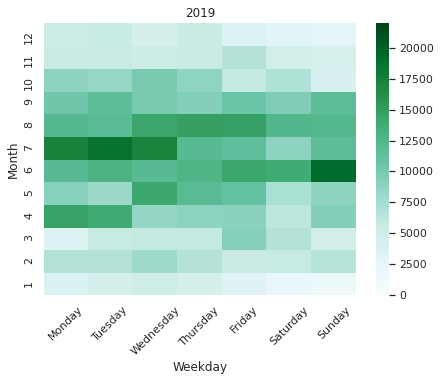

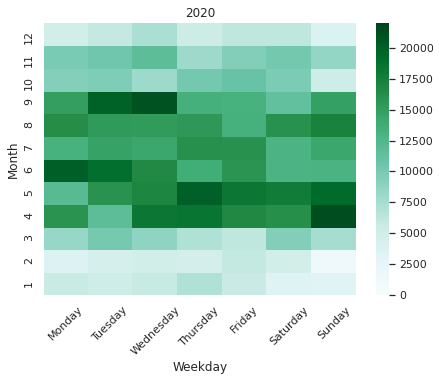

In [ ]:
sns.set_style('white')

bike_grug_2019=bike[(bike['Date'].dt.year == 2019)]
crosstab_1=pd.crosstab(bike_grug_2019['Month'],bike_grug_2019['Weekday'],values=bike_grug_2019['Value'],aggfunc='sum')
crosstab_1
ax1=sns.heatmap(crosstab_1,cmap='BuGn',xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],vmin=0,vmax=22000)
ax1.invert_yaxis()
ax1.set_title('2019')
plt.xticks(rotation=45)
plt.show()
plt.clf()

bike_grug_2020=bike[(bike['Date'].dt.year == 2020)]
crosstab_2=pd.crosstab(bike_grug_2020['Month'],bike_grug_2020['Weekday'],values=bike_grug_2020['Value'],aggfunc='sum')
crosstab_2
ax2=sns.heatmap(crosstab_2,cmap='BuGn',xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],vmin=0,vmax=22000)
ax2.set_title('2020')
plt.xticks(rotation=45)
ax2.invert_yaxis()
plt.show()

# Bike activity over the day on each weekday in 2019

The figures below show us the most active time during each weekday. During the week we can see the spikes caused by people using the bike to go to work/school and than back. On the weekend the activity is distributed over noon and afternoon, which are people going to biketours or other activities. We also see that the Grugatrasse is more used than the Huyssenallee.

In [ ]:
bike_2019=bike[bike['Date'].dt.year==2019]
bike_2019['Hour']=bike_2019['Date'].dt.hour


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


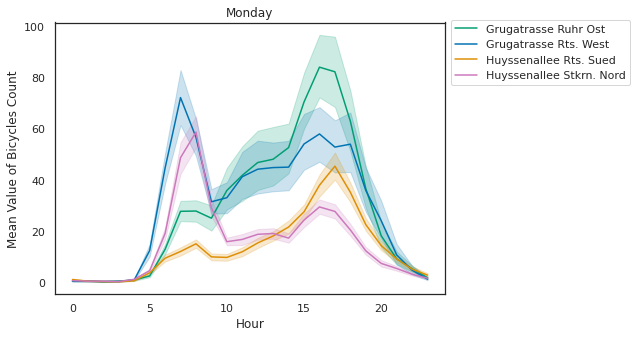

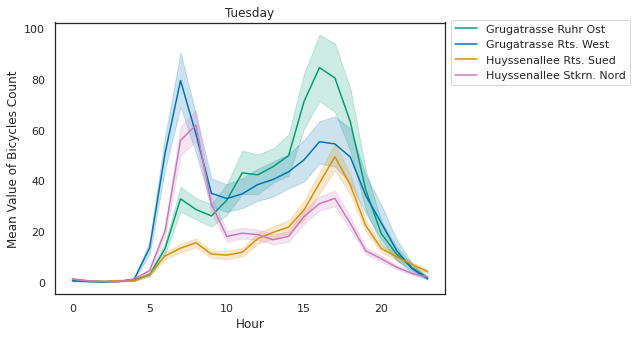

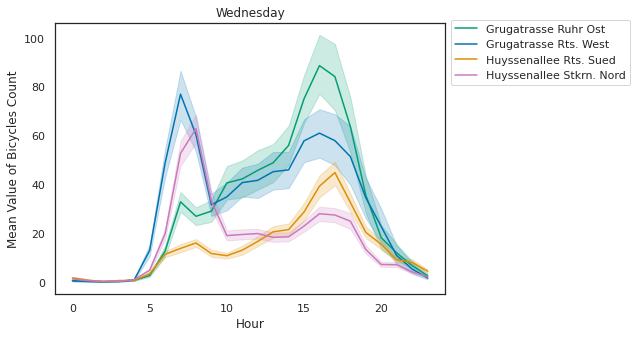

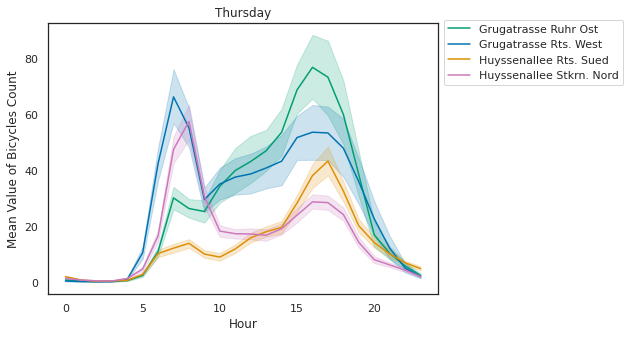

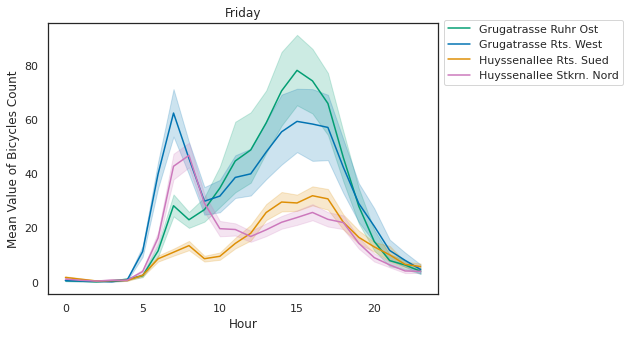

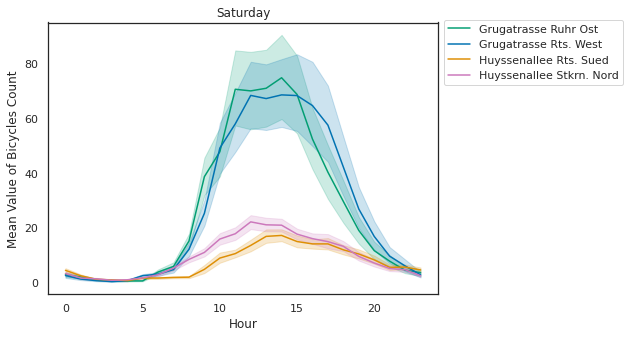

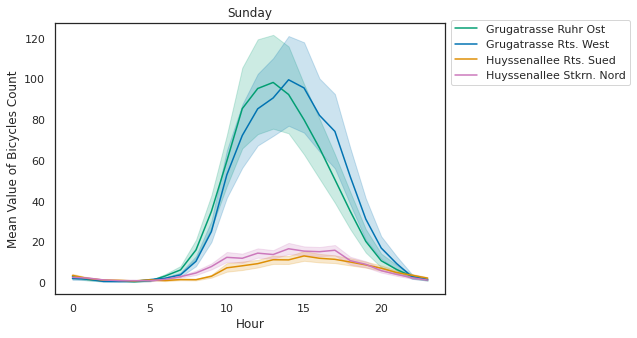

<Figure size 504x360 with 0 Axes>

In [ ]:
Weekdays=[0,1,2,3,4,5,6]

weekdict={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
hueorder=['Grugatrasse Ruhr Ost','Grugatrasse Rts. West','Huyssenallee Rts. Sued','Huyssenallee Stkrn. Nord']
current_palette = sns.color_palette('colorblind')
cb_palette=[current_palette[2],current_palette[0],current_palette[1],current_palette[4]]

for Weekday in Weekdays:
  sns.lineplot(data=bike_2019[bike_2019['Weekday']==Weekday],x='Hour',y='Value',hue='Street',hue_order=hueorder,palette=cb_palette).set_title(weekdict[Weekday])
  plt.ylabel('Mean Value of Bicycles Count')
  plt.legend(loc=3, bbox_to_anchor=(1, 0.75))
  plt.show()
  plt.clf()



# Growth of bike activity on each street from 2018 to 2020 (Sep-Dec)

In the plot below we see the a decline in activity in the year 2019 but an large growth in 2020, which is most likely caused be the COVID-19 pandemic.
As we saw in the previous visualisation, Grugatrasse has a much higher activity than Huyssealle. This is the case because Grugatrasse is a dedicated street for bicyclist.

In [ ]:
bike_sep_dec=bike[bike['Month'].isin([9,10,11,12])]  # I used the last 4 months since we couldt compare 2018 with the other years
bike_sep_dec['Year']=bike_sep_dec['Date'].dt.year


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0.5, 'Mean Value of Bikes Count (Hourly)'), Text(0.5, 0, 'Year')]

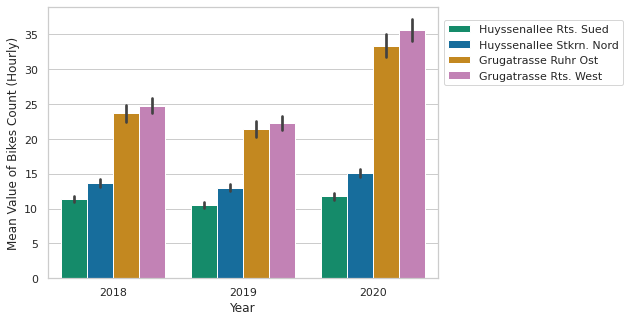

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style('whitegrid')


current_palette = sns.color_palette('colorblind')
hueorder=['Huyssenallee Rts. Sued','Huyssenallee Stkrn. Nord','Grugatrasse Ruhr Ost','Grugatrasse Rts. West']


ax=sns.barplot(data=bike_sep_dec,y='Value',x='Year',hue='Street',hue_order=hueorder,palette=[current_palette[2],current_palette[0],current_palette[1],current_palette[4]])
plt.legend(loc=3, bbox_to_anchor=(1, 0.69))
ax.set(xlabel='Year',ylabel='Mean Value of Bikes Count (Hourly)')

# Correlation between bike activity and temperature

In the visualisation below each point represent a day and we compare the total number of bikes count to the mean temperature of the day.
As one can expect there is a strong correlation between these values.
This confirms the thought we had in the first visual.

In [ ]:
mean_temp=pd.read_csv('/content/drive/My Drive/mean_temp_essen.txt')
mean_temp['Date']=pd.to_datetime(mean_temp['DATE'],dayfirst=True,format='%Y%m%d')
mean_temp=mean_temp[mean_temp['Date'].dt.year>=2019]
mean_temp['AVG Temp']=mean_temp['TG']/10
print(len(mean_temp[mean_temp['Q_TG']!=0]))   #no missing values
mean_temp=mean_temp.drop(columns=['TG','Q_TG','SOUID','DATE'])

0


In [ ]:
bike_daily=bike.copy()
bike_daily=bike_daily[bike_daily['Date'].dt.year>=2019]
bike_daily['Date']=bike_daily['Date'].dt.date
bike_daily=bike_daily.drop(columns=['Weekday','Month'])
bike_daily=bike_daily.groupby('Date',as_index=False).sum()


In [ ]:
mean_temp=mean_temp.reset_index()
mean_temp=mean_temp.drop(columns=['index'])

In [ ]:
bike_temp=bike_daily.join(mean_temp,rsuffix='Date')
bike_temp=bike_temp.drop(columns='DateDate')


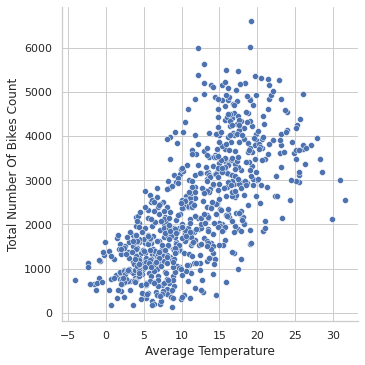

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style('whitegrid')
ax=sns.relplot(data=bike_temp,x='AVG Temp',y='Value')
ax.set(xlabel='Average Temperature',ylabel='Total Number Of Bikes Count')

# Correlation between bike activity and rain

With the same procedure as above we compare the average precipitation to the bike activity. There is a negative correlation which is a bit hard to see at first glance. But once we see that there are a lot of points overlapping at the zero value of the X-axis, we can also the there is a drop in the average number of bikes. The outliers can be explained by days where the rain occured at nights or only for a certain time period.

In [ ]:
bike_daily_2=bike[bike['Date'].dt.year>=2019]
bike_daily_2['Date']=bike_daily_2['Date'].dt.date
bike_daily_2=bike_daily_2.drop(columns=['Weekday','Month'])
bike_daily_2=bike_daily_2.groupby('Date',as_index=False).sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rain_data=pd.read_csv('/content/drive/My Drive/rain_essen.csv')

In [ ]:
rain_data['Date']=pd.to_datetime(rain_data['Zeitstempel'],format='%Y%m%d')
rain_data=rain_data.drop(['Produkt_Code','SDO_ID','Qualitaet_Byte','Qualitaet_Niveau'],axis=1)
rain_data['precipitation in mm']=rain_data['Wert']
rain_data=rain_data.drop(['Zeitstempel','Wert'],axis=1)
rain_data=rain_data[rain_data['Date'].dt.year>=2019].reset_index()
rain_data=rain_data.drop('index',axis=1)
bike_rain=bike_daily_2.join(rain_data,rsuffix='Date').drop('DateDate',axis=1)
bike_rain=bike_rain[bike_rain['precipitation in mm']<=15]


[Text(0, 0.5, 'Total Number Of Bikes Count'),
 Text(0.5, 0, 'Precipitation in mm')]

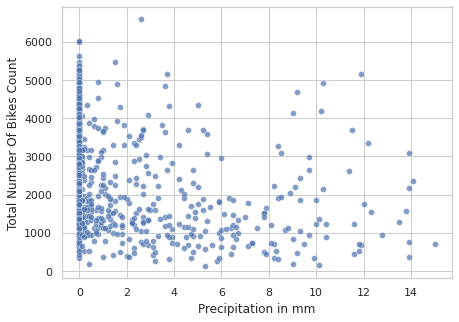

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style('whitegrid')
ax=sns.scatterplot(data=bike_rain,x='precipitation in mm', y='Value',alpha=0.7)
ax.set(xlabel='Precipitation in mm',ylabel='Total Number Of Bikes Count')